# XYZ-Stage movement
Documentation of datasheets and testing </br>
30.04.2024

---
Hardware Resources:
* [Standa USB-Controller](https://www.standa.lt/products/catalog/motorised_positioners?item=525)
* [Standa XY-stage](https://www.standa.lt/products/catalog/motorised_positioners?item=311&prod=motrized_xy_scanning_stage)
    * 75 mm total travel in both axes
    * *Home* position = 0 $\rightarrow$ middle position
* [Thorlabs Z-stage + Controller](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=4018&pn=MLJ250/M)
    * repeating command for in- or decrementing steps leads to home position!
    * 50 mm travel
    * *Home* position = 0 $\rightarrow$ lowest position
    * no calibration available for real physical units, only device units (number of steps)
    * 1228800 steps should be 1 mm of travel according to documentation
* [Thorlabs piezo Z-stage](https://www.thorlabs.com/newgrouppage9.cfm?objectgroup_id=9776&pn=PIA13#9786)
    * 13 mm of travel
    * no metric units available ('set and forget')
    * maximum load in direction of movement: 2.5 kg
    * stepsize "typically" 20 nm
    * no home position
* [Gaming controller](https://de.hyperx.com/en/products/hyperx-clutch-wireless-gaming-controller)
    * Control layout: <img src="./documentation/layout_controller.png" width="370" height="260" align="center"/>

Software Resources:
* [Standa Python Library](https://files.xisupport.com/other_files/JupyterNotebook/Standa_8SMC5_USB_Python_tutorial.html)
* [PyJoystick Library](https://github.com/justengel/pyjoystick/blob/master/pyjoystick/interface.py)
* [Thorlabs Kinesis Software](https://www.thorlabs.com/software_pages/ViewSoftwarePage.cfm?Code=Motion_Control&viewtab=0)
* [Thorlabs Python API](https://pylablib.readthedocs.io/en/latest/.apidoc/pylablib.devices.Thorlabs.html)

In [1]:
from pyjoystick.sdl2 import Key, Joystick, run_event_loop
import pyjoystick
from functools import partial

def key_received(key):
    print(f"Keytype: {key.keytype}\nKey number: {key.number}\nKey value: {key.value}\n")

#z_stage, xy_stage = initialize_hardware()
arg_handler = partial(key_received)
repeater = pyjoystick.Repeater(first_repeat_timeout=0.5, repeat_timeout=0.03, check_timeout=0.01)
mngr = pyjoystick.ThreadEventManager(event_loop=run_event_loop,
                                    handle_key_event=arg_handler,
                                    button_repeater=repeater)
mngr.start()

Keytype: Hat
Key number: 0
Key value: 1

Keytype: Hat
Key number: 0
Key value: 0

Keytype: Hat
Key number: 0
Key value: 2

Keytype: Hat
Key number: 0
Key value: 0

Keytype: Button
Key number: 7
Key value: 1

Keytype: Button
Key number: 7
Key value: 0

Keytype: Button
Key number: 6
Key value: 1

Keytype: Button
Key number: 6
Key value: 0

Keytype: Button
Key number: 7
Key value: 1

Keytype: Button
Key number: 7
Key value: 0

Keytype: Button
Key number: 10
Key value: 1

Keytype: Button
Key number: 10
Key value: 0

Keytype: Button
Key number: 10
Key value: 1

Keytype: Button
Key number: 10
Key value: 0

Keytype: Button
Key number: 10
Key value: 1

Keytype: Button
Key number: 10
Key value: 0

Keytype: Button
Key number: 10
Key value: 1

Keytype: Button
Key number: 10
Key value: 0

Keytype: Button
Key number: 10
Key value: 1

Keytype: Button
Key number: 10
Key value: 0

Keytype: Button
Key number: 10
Key value: 1

Keytype: Button
Key number: 10
Key value: 0

Keytype: Button
Key number: 7
Ke

In [ ]:
from pylablib.devices import Thorlabs

connected_devices = Thorlabs.list_kinesis_devices()
if not len(connected_devices):
    raise ConnectionError("Error: No devices connected!")
print("Found compatible Thorlabs device(s):")
for e, device in enumerate(connected_devices):
    print(f"\t{device[1]} with serial number {device[0]}")
    try:
        _ = device.index("N")
        serialnumber = connected_devices[e][0]
    except ValueError:
        pass
try:
    stage = Thorlabs.KinesisMotor(serialnumber)
except (Thorlabs.ThorlabsError, NameError):
    print("The device was probably opened before or is not even connected!")
    #raise ConnectionError("The device was probably opened before or is not connected")

0.43132803632236094


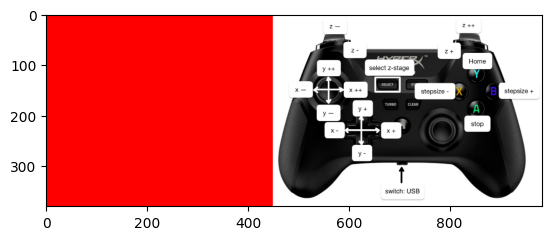

-1

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

display = np.zeros((380, 450, 3), dtype=np.uint8)
print(380/881)
layout_img = cv2.imread("./documentation/layout_controller.png", cv2.IMREAD_COLOR)
layout_img = cv2.resize(layout_img, (0,0), fx=display.shape[0]/layout_img.shape[0],
                        fy=display.shape[0]/layout_img.shape[0])
final = np.hstack((display, layout_img))
final[:380, :450] = (255, 0, 0)
plt.figure(0)
plt.imshow(final)
plt.show()
display[152:154,:] = (255,255,255)
display[302:304,:] = (255,255,255)
cv2.putText(display, f"X: 21.212 mm", (90,50), thickness=2, lineType=cv2.LINE_AA,
            fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.1, color=(255, 255, 255) if 1 > 2 else (120, 255, 0))
cv2.putText(display, f"Y: 23.471 mm", (90,90), thickness=2, lineType=cv2.LINE_AA,
                fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.1, color=(255, 255, 255))
cv2.putText(display, f"Z: 33.567 mm", (90,130), thickness=2, lineType=cv2.LINE_AA,
            fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.1, color=(255, 255, 255))
cv2.putText(display, f"X stepsize: {0.3*1e3:.0f} um", (50,200), thickness=2, lineType=cv2.LINE_AA,
            fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.1, color=(255, 255, 255))
cv2.putText(display, f"Y stepsize: {0.003*1e3:.0f} um", (50,240), thickness=2, lineType=cv2.LINE_AA,
            fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.1, color=(255, 255, 255))
cv2.putText(display, f"Z stepsize: {0.003*1e3:.0f} um", (50,280), thickness=2, lineType=cv2.LINE_AA,
            fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.1, color=(255, 255, 255))
cv2.putText(display, f"z-stage: piezo Labjack", (20,350), thickness=2, lineType=cv2.LINE_AA,
            fontFace = cv2.FONT_HERSHEY_SIMPLEX, fontScale=1.1, color=(255, 255, 255))
cv2.rectangle(display, (180,315), (290, 370), (0,120,255), thickness=2, lineType=cv2.LINE_AA)
cv2.rectangle(display, (290,315), (435, 370), (0,120,255), thickness=2, lineType=cv2.LINE_AA)
cv2.imshow("XYZ position", display)
cv2.waitKey(1)